In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv("../data/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Change pandas dataframe to a numpy array for easier manipulation
data = np.array(data)

# Get the dimensions of the data
m, n = data.shape

# Shuffle the data
np.random.shuffle(data)

# Split the data for cross validation
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_, m_train = X_train.shape

In [46]:
class NeuralNetwork:
    def __init__(self):
        self.W1 = np.random.rand(10, 784) - 0.5
        self.b1 = np.random.rand(10, 1) - 0.5
        self.W2 = np.random.rand(10, 10) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5

    def ReLU(self, Z):
        return np.maximum(Z, 0)

    def softmax(self, Z):
        return np.exp(Z) / sum(np.exp(Z))

    def forward_pass(self, X):
        Z1 = self.W1.dot(X) + self.b1
        A1 = self.ReLU(Z1)
        Z2 = self.W2.dot(A1) + self.b2
        A2 = self.softmax(Z2)
        return Z1, A1, Z2, A2

    def one_hot(self, Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y

    def derivative_ReLU(self, Z):
        return Z > 0

    def backward_propagation(self, Z1, A1, Z2, A2, X, Y):
        one_hot_Y = self.one_hot(Y)

        dZ2 = A2 - one_hot_Y
        dW2 = (1 / m) * dZ2.dot(A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1).reshape(-1, 1)

        dZ1 = self.W2.T.dot(dZ2) * self.derivative_ReLU(Z1)
        dW1 = (1 / m) * dZ1.dot(X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1).reshape(-1, 1)

        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2, alpha):
        self.W1 = self.W1 - alpha * dW1
        self.b1 = self.b1 - alpha * db1
        self.W2 = self.W2 - alpha * dW2
        self.b2 = self.b2 - alpha * db2

    def get_predictions(self, A2):
        return np.argmax(A2, 0)

    def get_accuracy(self, predictions, Y):
        return np.sum(predictions == Y) / Y.size

    def gradient_descent(self, X, Y, iterations, alpha):
        for i in range(iterations):
            Z1, A1, Z2, A2 = self.forward_pass(X)
            dW1, db1, dW2, db2 = self.backward_propagation(Z1, A1, Z2, A2, X, Y)
            self.update_params(dW1, db1, dW2, db2, alpha)
            if i % 50 == 0:
                print("Iteration: ", i)
                print(
                    "Accuracy: ", self.get_accuracy(self.get_predictions(A2), Y) * 100
                )

    def make_predictions(self, X):
        _, _, _, self.A2 = self.forward_pass(X)
        predictions = self.get_predictions(self.A2)
        return predictions

    def test_predictions(self, index):
        current_image = X_train[:, index, None]
        prediction = self.make_predictions(current_image)
        label = Y_train[index]
        print("Prediction: ", prediction)
        print("Label: ", label)

        self.show_image(index)

    def show_image(self, index):
        current_image = X_train[:, index, None]
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation="nearest")
        plt.show()

In [47]:
NN = NeuralNetwork()
NN.gradient_descent(X_train, Y_train, 1000, 0.3)

Iteration:  0
Accuracy:  12.58780487804878
Iteration:  50
Accuracy:  71.2390243902439
Iteration:  100
Accuracy:  80.51951219512196
Iteration:  150
Accuracy:  83.65121951219511
Iteration:  200
Accuracy:  85.21463414634147
Iteration:  250
Accuracy:  86.22926829268293
Iteration:  300
Accuracy:  87.42926829268292
Iteration:  350
Accuracy:  88.00731707317073
Iteration:  400
Accuracy:  88.50243902439024
Iteration:  450
Accuracy:  88.9390243902439
Iteration:  500
Accuracy:  89.25853658536586
Iteration:  550
Accuracy:  89.58048780487805
Iteration:  600
Accuracy:  89.82439024390244
Iteration:  650
Accuracy:  89.99268292682927
Iteration:  700
Accuracy:  90.15121951219513
Iteration:  750
Accuracy:  90.32682926829268
Iteration:  800
Accuracy:  90.42439024390244
Iteration:  850
Accuracy:  90.5780487804878
Iteration:  900
Accuracy:  90.6219512195122
Iteration:  950
Accuracy:  90.76341463414634


Prediction:  [2]
Label:  2


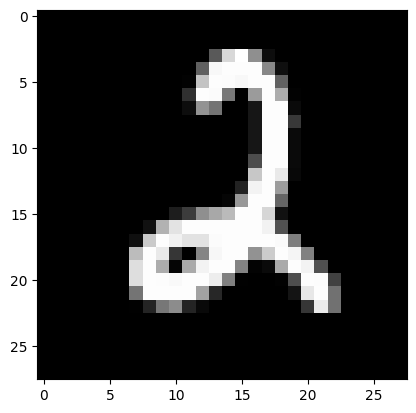

In [48]:
NN.test_predictions(0)

Prediction:  [2]
Label:  2


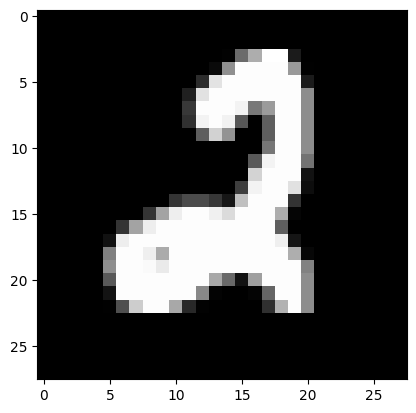

In [49]:
NN.test_predictions(23)

Prediction:  [2]
Label:  2


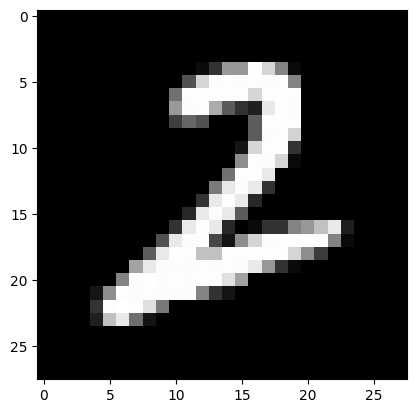

In [50]:
NN.test_predictions(43)

Prediction:  [5]
Label:  5


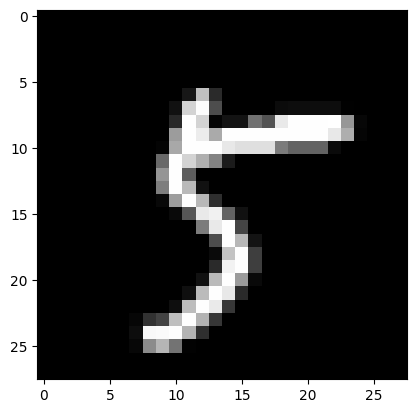

In [51]:
NN.test_predictions(93)

Prediction:  [0]
Label:  0


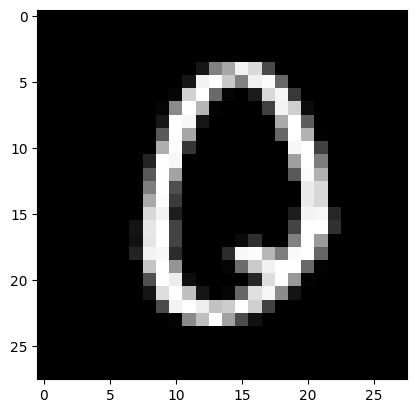

In [52]:
NN.test_predictions(128)

Prediction:  [9]
Label:  9


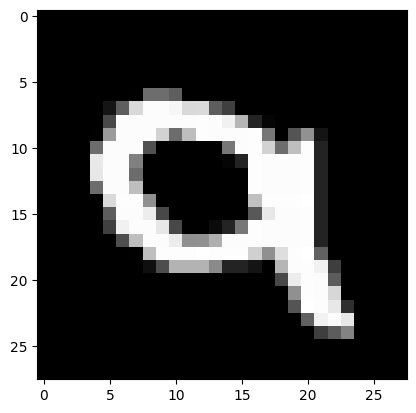

In [53]:
NN.test_predictions(198)